In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

**9. This question involves the use of multiple linear regression on the
Auto data set.**

**(a) Produce a scatterplot matrix which includes all of the variables
in the data set.**

In [2]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


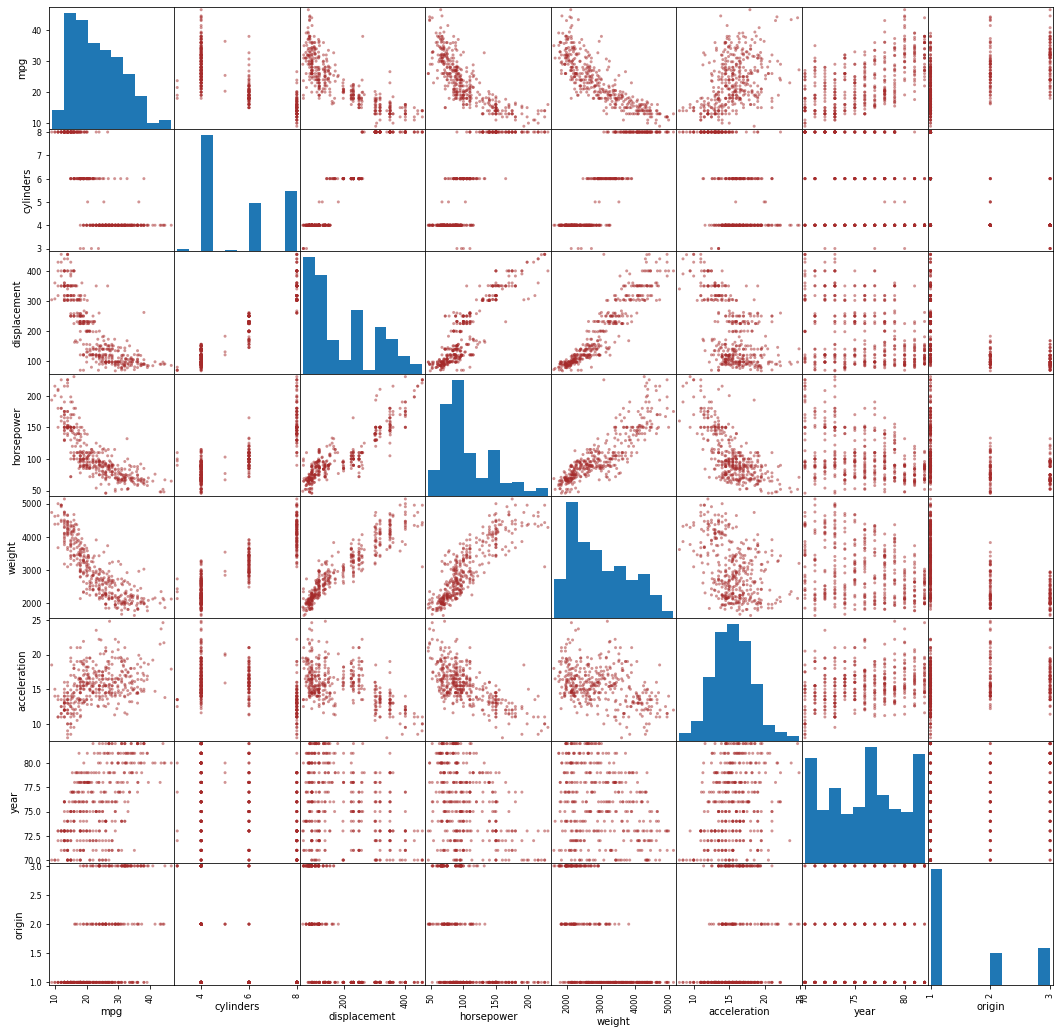

In [3]:
#对应原文中pairs(Auto)
from pandas.plotting import scatter_matrix
scatter_matrix(Auto, color="brown",figsize=(18, 18))
plt.grid(linestyle='')

**(b) Compute the matrix of correlations between the variables using
the function cor() . You will need to exclude the name variable,
which is qualitative.**

In [4]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**(c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:**

**i. Is there a relationship between the predictors and the re-
sponse?**

In [5]:
column_names = '1'
for column_name in Auto.columns:
    column_names = column_names + '+' + column_name
results_smf = smf.ols('mpg ~ {} - mpg - name '.format(column_names),data = Auto).fit()
results_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          2.04e-139
Time:                        17:22:39   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
results_smf.f_pvalue

2.0371059307552074e-139

从results_smf.summary()中F-statistic拒绝零假设（null hypothes），可见预测变量与相应变量相关。

**ii. Which predictors appear to have a statistically significant
relationship to the response?**

In [7]:
results_smf.pvalues

Intercept       2.401841e-04
cylinders       1.277965e-01
displacement    8.444649e-03
horsepower      2.196328e-01
weight          7.874953e-21
acceleration    4.154780e-01
year            3.055983e-39
origin          4.665681e-07
dtype: float64

从系数p值可见除了cylinders、acceleration、horsepower，其他预测变量均可以拒绝零假设（null hypothes），与响应变量显著相关。

**iii. What does the coefficient for the year variable suggest?**

In [8]:
results_smf.params.year

0.7507726779503129

可见mpg与year正相关明显，year增长1单元，mpg增长0.75单位。

**(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?**

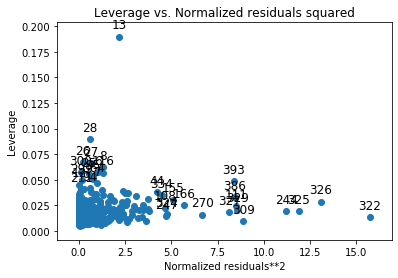

In [9]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(results_smf)

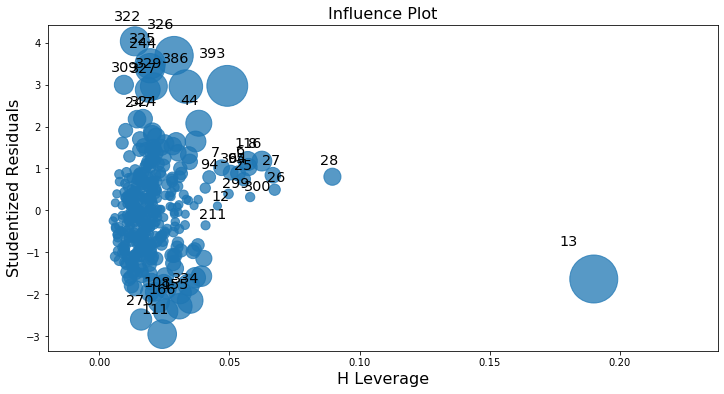

In [10]:
#statsmodels绘制杠杆等级方式2，横轴为杠杆等级，竖轴为学生化残差（代表离散情况）
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(results_smf, ax=ax)

离散点322学生化残差值绝对值大于3，可能是离散点

In [11]:
print('(p+1)/n :',(7+1)/len(Auto))

(p+1)/n : 0.02040816326530612


大杠杆点13，杠杆统计量约为0.19，大大超过(p+1)/n = 0.02,可见存在异常高杠杆作用点

**(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?**

In [12]:
column_names = '1'
no_column_names = ['mpg','name']
for column_name in Auto.columns:
    for column_name2 in Auto.columns: 
        if column_name not in no_column_names and column_name2 not in no_column_names and column_name2!= column_name:
            column_names = column_names + '+' + column_name + '*' + column_name2
results_smf_interaction = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_smf_interaction .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          4.01e-155
Time:                        17:22:41   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [13]:
results_smf_interaction.pvalues

Intercept                    0.504748
cylinders                    0.397381
displacement                 0.011921
cylinders:displacement       0.600513
horsepower                   0.147693
cylinders:horsepower         0.631568
weight                       0.814418
cylinders:weight             0.689995
acceleration                 0.007354
cylinders:acceleration       0.095843
year                         0.253400
cylinders:year               0.073885
origin                       0.003446
cylinders:origin             0.414817
displacement:horsepower      0.768666
displacement:weight          0.093419
displacement:acceleration    0.298534
displacement:year            0.013516
displacement:origin          0.218748
horsepower:weight            0.501243
horsepower:acceleration      0.053252
horsepower:year              0.139161
horsepower:origin            0.939309
weight:acceleration          0.305960
weight:year                  0.291816
weight:origin                0.716229
acceleration

可拒绝零假设（null hypothes）的交互项（p值小于0.1）有ylinders:acceleration、cylinders:year、displacement:year、acceleration:year、acceleration:origin、acceleration:horsepower_float、year:origin存在统计显著的交互作用，其中acceleration:origin为0.003最为明显。

In [14]:
results_smf_interaction.pvalues < 0.1

Intercept                    False
cylinders                    False
displacement                  True
cylinders:displacement       False
horsepower                   False
cylinders:horsepower         False
weight                       False
cylinders:weight             False
acceleration                  True
cylinders:acceleration        True
year                         False
cylinders:year                True
origin                        True
cylinders:origin             False
displacement:horsepower      False
displacement:weight           True
displacement:acceleration    False
displacement:year             True
displacement:origin          False
horsepower:weight            False
horsepower:acceleration       True
horsepower:year              False
horsepower:origin            False
weight:acceleration          False
weight:year                  False
weight:origin                False
acceleration:year             True
acceleration:origin           True
year:origin         

In [15]:
#根据系数p值，构造新的模型
column_names = '1'
for index_name in results_smf_interaction.pvalues[results_smf_interaction.pvalues < 0.1].index:
    if ':' in index_name:
        column_names = column_names + '+' + index_name.replace(':','*')
    elif index_name != 'Intercept':
        column_names = column_names + '+' + index_name
results_smf_interaction_improve = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_smf_interaction_improve .summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     187.2
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          5.90e-164
Time:                        17:22:42   Log-Likelihood:                -942.43
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     376   BIC:                             1980.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  67.7069     36.279      1.866      0.063      -3.627     139.041
displacement               -0.2187      0.116     -1.886      0.060      -0.447       0.009
acceleration               -5.9353      1.510     -3.930      0.000      -8.905      -2.966
cylinders                   9.1249      6.076      1.502      0.134      -2.822      21.071
cylinders:acceleration      0.1951      0.066      2.972      0.003       0.066       0.324
year                        0.0244      0.453      0.054      0.957      -0.865       0.914
cylinders:year             -0.1546      0.082     -1.875      0.062      -0.317       0.007
origin                    -15.1426      5.443     -2.782      0.006     -25.845      -4.440
weight                     -0.0087      0.001    -10.277      0.000      -0.010      -0.007
displacement:weight      1.944e-05   2.35e-06      8.270      0.000    1.48e-05    2.41e-05
displacement:year           0.0019      0.002      1.238      0.216      -0.001       0.005
horsepower                  0.0602      0.040      1.520      0.129      -0.018       0.138
horsepower:acceleration    -0.0069      0.003     -2.557      0.011      -0.012      -0.002
acceleration:year           0.0645      0.019      3.483      0.001       0.028       0.101
acceleration:origin         0.3911      0.106      3.707      0.000       0.184       0.599
year:origin                 0.1194      0.065      1.842      0.066      -0.008       0.247
==============================================================================
Omnibus:                       55.694   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.183
Skew:                           0.661   Prob(JB):                     7.38e-35
Kurtosis:                       5.806   Cond. No.                     2.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
results_smf_interaction_improve.mse_resid

7.479155681202873

In [17]:
#继续优化
column_names = '1'
for index_name in results_smf_interaction_improve.pvalues[results_smf_interaction_improve.pvalues < 0.1].index:
    if ':' in index_name:
        column_names = column_names + '+' + index_name.replace(':','*')
    elif index_name != 'Intercept':
        column_names = column_names + '+' + index_name
results_smf_interaction_improve2 = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_smf_interaction_improve2 .summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          8.76e-165
Time:                        17:22:42   Log-Likelihood:                -943.23
No. Observations:                 392   AIC:                             1916.
Df Residuals:                     377   BIC:                             1976.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  68.6770     36.296      1.892      0.059      -2.690     140.044
displacement               -0.0757      0.011     -7.177      0.000      -0.096      -0.055
acceleration               -5.5336      1.476     -3.749      0.000      -8.436      -2.631
cylinders                   2.5128      2.901      0.866      0.387      -3.190       8.216
cylinders:acceleration      0.1757      0.064      2.754      0.006       0.050       0.301
year                        0.0082      0.453      0.018      0.986      -0.882       0.898
cylinders:year             -0.0633      0.037     -1.714      0.087      -0.136       0.009
origin                    -13.1584      5.205     -2.528      0.012     -23.394      -2.923
weight                     -0.0085      0.001    -10.199      0.000      -0.010      -0.007
displacement:weight      1.889e-05   2.31e-06      8.178      0.000    1.44e-05    2.34e-05
horsepower                  0.0418      0.037      1.137      0.256      -0.030       0.114
horsepower:acceleration    -0.0057      0.003     -2.265      0.024      -0.011      -0.001
acceleration:year           0.0590      0.018      3.281      0.001       0.024       0.094
acceleration:origin         0.3988      0.105      3.784      0.000       0.192       0.606
year:origin                 0.0919      0.061      1.508      0.132      -0.028       0.212
==============================================================================
Omnibus:                       58.141   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.605
Skew:                           0.686   Prob(JB):                     6.64e-37
Kurtosis:                       5.884   Cond. No.                     2.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
results_smf_interaction_improve2.mse_resid

7.489736442895017

In [19]:
#继续优化
column_names = '1'
for index_name in results_smf_interaction_improve2.pvalues[results_smf_interaction_improve2.pvalues < 0.1].index:
    if ':' in index_name:
        column_names = column_names + '+' + index_name.replace(':','*')
    elif index_name != 'Intercept':
        column_names = column_names + '+' + index_name
results_smf_interaction_improve3 = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_smf_interaction_improve3 .summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     214.7
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          1.81e-165
Time:                        17:22:42   Log-Likelihood:                -944.41
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     378   BIC:                             1972.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  38.8944     30.502      1.275      0.203     -21.081      98.870
displacement               -0.0737      0.010     -7.032      0.000      -0.094      -0.053
acceleration               -5.1568      1.457     -3.539      0.000      -8.022      -2.292
cylinders                   4.8708      2.447      1.991      0.047       0.059       9.682
cylinders:acceleration      0.1763      0.064      2.760      0.006       0.051       0.302
year                        0.3826      0.379      1.009      0.313      -0.363       1.128
cylinders:year             -0.0937      0.031     -3.023      0.003      -0.155      -0.033
origin                     -5.7427      1.709     -3.360      0.001      -9.103      -2.383
weight                     -0.0085      0.001    -10.152      0.000      -0.010      -0.007
displacement:weight       1.86e-05   2.31e-06      8.068      0.000    1.41e-05    2.31e-05
horsepower                  0.0429      0.037      1.165      0.245      -0.029       0.115
horsepower:acceleration    -0.0060      0.003     -2.375      0.018      -0.011      -0.001
acceleration:year           0.0547      0.018      3.075      0.002       0.020       0.090
acceleration:origin         0.3829      0.105      3.645      0.000       0.176       0.589
==============================================================================
Omnibus:                       58.597   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.966
Skew:                           0.692   Prob(JB):                     3.36e-37
Kurtosis:                       5.893   Cond. No.                     1.86e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

从上述流程可见，最后模型最佳，可拒绝零假设（null hypothes）的交互项（p值小于0.1）有ylinders:acceleration、cylinders:year、displacement:year、acceleration:year、acceleration:origin、acceleration:horsepower_float、year:origin存在统计显著的交互作用（不能通过RSS和RSE比较，因为越复杂的模型训练残差肯定越小，存在过拟合，如下）

In [20]:
print('no interaction rse: ' , results_smf.mse_resid , '<--> no interaction rss: ' , results_smf.ssr)
print('all interaction rse: ' , results_smf_interaction.mse_resid , '<--> all interaction rss: ' , results_smf_interaction.ssr)
print('improve interaction rse: ' , results_smf_interaction_improve.mse_resid , '<--> improve interaction rss: ' , results_smf_interaction_improve.ssr)
print('improve2 interaction rse: ' , results_smf_interaction_improve2.mse_resid , '<--> improve2 interaction rss: ' , results_smf_interaction_improve2.ssr)
print('improve3 interaction rse: ' , results_smf_interaction_improve3.mse_resid , '<--> improve3 interaction rss: ' , results_smf_interaction_improve3.ssr)

no interaction rse:  11.073470131354627 <--> no interaction rss:  4252.212530440177
all interaction rse:  7.26053125661985 <--> all interaction rss:  2635.5728461530057
improve interaction rse:  7.479155681202873 <--> improve interaction rss:  2812.1625361322804
improve2 interaction rse:  7.489736442895017 <--> improve2 interaction rss:  2823.6306389714214
improve3 interaction rse:  7.514972982305244 <--> improve3 interaction rss:  2840.659787311382


**(f) Try a few different transformations of the variables, such as
log(X),
√ X, X 2 . Comment on your findings.**

In [21]:
#考虑在第二项结果基础上进行优化
#首先迭代log(x)及√ X提取p<0.1情况，而对x^n次方则不断迭代到p>0.1停止
column_names = '1'
for index_name in results_smf_interaction_improve3.pvalues.index:
    if ':' in index_name:
        column_names = column_names + '+' + index_name.replace(':','*')
    elif index_name != 'Intercept':
        column_names = column_names + '+' + index_name + '+  np.log({})'.format(index_name)
results_smf_interaction_log = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_smf_interaction_log .summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     148.8
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          1.90e-163
Time:                        17:22:42   Log-Likelihood:                -930.02
No. Observations:                 392   AIC:                             1902.
Df Residuals:                     371   BIC:                             1985.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2255.3128    514.403      4.384      0.000    1243.801    3266.824
displacement               -0.0983      0.040     -2.489      0.013      -0.176      -0.021
np.log(displacement)        3.9726      3.946      1.007      0.315      -3.786      11.731
acceleration               -4.5488      1.623     -2.802      0.005      -7.741      -1.356
np.log(acceleration)      -11.0980     11.679     -0.950      0.343     -34.064      11.867
cylinders                  -0.7006      3.023     -0.232      0.817      -6.644       5.243
np.log(cylinders)           7.0107      7.674      0.914      0.362      -8.080      22.101
cylinders:acceleration      0.1303      0.068      1.927      0.055      -0.003       0.263
year                        8.5643      2.005      4.271      0.000       4.621      12.507
np.log(year)             -643.0534    150.014     -4.287      0.000    -938.037    -348.070
cylinders:year             -0.0289      0.036     -0.799      0.425      -0.100       0.042
origin                     -7.5787      2.290     -3.309      0.001     -12.082      -3.075
np.log(origin)              3.7802      3.054      1.238      0.217      -2.224       9.785
weight                     -0.0072      0.006     -1.173      0.242      -0.019       0.005
np.log(weight)             -3.7987     13.800     -0.275      0.783     -30.934      23.337
displacement:weight      2.074e-05   8.06e-06      2.572      0.010    4.89e-06    3.66e-05
horsepower                  0.0249      0.050      0.498      0.619      -0.073       0.123
np.log(horsepower)         -6.2045      5.319     -1.167      0.244     -16.663       4.254
horsepower:acceleration    -0.0014      0.005     -0.318      0.751      -0.010       0.007
acceleration:year           0.0523      0.019      2.806      0.005       0.016       0.089
acceleration:origin         0.3779      0.104      3.626      0.000       0.173       0.583
==============================================================================
Omnibus:                       49.280   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.352
Skew:                           0.585   Prob(JB):                     1.49e-30
Kurtosis:                       5.653   Cond. No.                     3.35e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#以上结果基础上迭代√ X
column_names = '1'
for index_name in results_smf_interaction_log.pvalues.index:
    if ':' in index_name:
        column_names = column_names + '+' + index_name.replace(':','*')
    elif 'log' in index_name:
        #只保留p<0.1的系数
        if results_smf_interaction_log.pvalues[index_name] < 0.1:
            column_names = column_names + '+' + index_name       
    elif index_name != 'Intercept':
        column_names = column_names + '+' + index_name + '+  np.sqrt({})'.format(index_name)
results_smf_interaction_log_sqrt = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_smf_interaction_log_sqrt .summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     145.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          2.75e-164
Time:                        17:22:42   Log-Likelihood:                -925.28
No. Observations:                 392   AIC:                             1895.
Df Residuals:                     370   BIC:                             1982.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 7.91e+04   2.49e+04      3.172      0.002    3.01e+04    1.28e+05
displacement               -0.1262      0.063     -1.992      0.047      -0.251      -0.002
np.sqrt(displacement)       1.2735      1.245      1.023      0.307      -1.174       3.721
acceleration               -3.5216      1.989     -1.771      0.077      -7.432       0.389
np.sqrt(acceleration)      -6.8569     12.170     -0.563      0.573     -30.789      17.075
cylinders                  -0.2004      3.755     -0.053      0.957      -7.583       7.183
np.sqrt(cylinders)          9.5389     12.913      0.739      0.461     -15.853      34.931
cylinders:acceleration      0.1251      0.068      1.839      0.067      -0.009       0.259
year                     -754.1574    247.398     -3.048      0.002   -1240.640    -267.675
np.sqrt(year)            2.659e+04   8623.870      3.083      0.002    9630.640    4.35e+04
np.log(year)            -5.854e+04   1.88e+04     -3.117      0.002   -9.55e+04   -2.16e+04
cylinders:year             -0.0453      0.036     -1.244      0.214      -0.117       0.026
origin                     -9.5927      3.596     -2.668      0.008     -16.664      -2.522
np.sqrt(origin)            11.9171      9.070      1.314      0.190      -5.918      29.752
weight                     -0.0050      0.012     -0.432      0.666      -0.028       0.018
np.sqrt(weight)            -0.4149      1.078     -0.385      0.701      -2.535       1.705
displacement:weight      2.204e-05   9.02e-06      2.442      0.015    4.29e-06    3.98e-05
horsepower                  0.0450      0.069      0.647      0.518      -0.092       0.182
np.sqrt(horsepower)        -1.0668      2.066     -0.516      0.606      -5.130       2.996
horsepower:acceleration    -0.0033      0.005     -0.725      0.469      -0.012       0.006
acceleration:year           0.0444      0.019      2.386      0.018       0.008       0.081
acceleration:origin         0.3588      0.103      3.471      0.001       0.156       0.562
==============================================================================
Omnibus:                       49.167   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.674
Skew:                           0.582   Prob(JB):                     1.27e-30
Kurtosis:                       5.659   Cond. No.                     2.05e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#以上结果基础上迭代X的n次方
results_improve_end = results_smf_interaction_log_sqrt
#最大次方迭代目标（备注nmax - 1）
nmax = 100
for n in range(2,nmax):
    check_neg_sum = 7
    column_names = '1'
    for index_name in results_improve_end.pvalues.index:
        if ':' in index_name:
            column_names = column_names + '+' + index_name.replace(':','*')
        elif 'log' in index_name or 'sqrt' in index_name or '**' in index_name:
            if results_improve_end.pvalues[index_name] < 0.1:
                column_names = column_names + '+' + index_name
        elif index_name != 'Intercept':
            if n == 2:
                check_tag = 1
            else:
                for index_name_check in results_improve_end.pvalues.index:
                    check_tag = 0
                    if 'I({} ** {})'.format(index_name,str(n-1)) in index_name_check:
                        if results_improve_end.pvalues[index_name_check] < 0.1:
                            check_tag = 1
                            break
                        else:
                            check_tag = 2
                            break
            if check_tag == 1:
                column_names = column_names + '+' + index_name + '+  I({}**{})'.format(index_name,str(n))
            else:
                column_names = column_names + '+' + index_name
                check_neg_sum = check_neg_sum - 1
    print('迭代次数为{}的columns： '.format(str(n)), column_names)
    results_improve_end = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
    if check_neg_sum == 0:
        print('具备满足p值的极限迭代次方',n-1)
        break
results_improve_end.summary() 

迭代次数为2的columns：  1+displacement+  I(displacement**2)+acceleration+  I(acceleration**2)+cylinders+  I(cylinders**2)+cylinders*acceleration+year+  I(year**2)+np.sqrt(year)+np.log(year)+cylinders*year+origin+  I(origin**2)+weight+  I(weight**2)+displacement*weight+horsepower+  I(horsepower**2)+horsepower*acceleration+acceleration*year+acceleration*origin
迭代次数为3的columns：  1+displacement+acceleration+cylinders+cylinders*acceleration+year+  I(year**3)+I(year ** 2)+np.sqrt(year)+np.log(year)+cylinders*year+origin+weight+displacement*weight+horsepower+horsepower*acceleration+acceleration*year+acceleration*origin
迭代次数为4的columns：  1+displacement+acceleration+cylinders+cylinders*acceleration+year+cylinders*year+origin+weight+displacement*weight+horsepower+horsepower*acceleration+acceleration*year+acceleration*origin
具备满足p值的极限迭代次方 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     214.7
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          1.81e-165
Time:                        17:22:43   Log-Likelihood:                -944.41
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     378   BIC:                             1972.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  38.8944     30.502      1.275      0.203     -21.081      98.870
displacement               -0.0737      0.010     -7.032      0.000      -0.094      -0.053
acceleration               -5.1568      1.457     -3.539      0.000      -8.022      -2.292
cylinders                   4.8708      2.447      1.991      0.047       0.059       9.682
cylinders:acceleration      0.1763      0.064      2.760      0.006       0.051       0.302
year                        0.3826      0.379      1.009      0.313      -0.363       1.128
cylinders:year             -0.0937      0.031     -3.023      0.003      -0.155      -0.033
origin                     -5.7427      1.709     -3.360      0.001      -9.103      -2.383
weight                     -0.0085      0.001    -10.152      0.000      -0.010      -0.007
displacement:weight       1.86e-05   2.31e-06      8.068      0.000    1.41e-05    2.31e-05
horsepower                  0.0429      0.037      1.165      0.245      -0.029       0.115
horsepower:acceleration    -0.0060      0.003     -2.375      0.018      -0.011      -0.001
acceleration:year           0.0547      0.018      3.075      0.002       0.020       0.090
acceleration:origin         0.3829      0.105      3.645      0.000       0.176       0.589
==============================================================================
Omnibus:                       58.597   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.966
Skew:                           0.692   Prob(JB):                     3.36e-37
Kurtosis:                       5.893   Cond. No.                     1.86e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

以上迭代过程发现混入高次方后，有些非0假设p值项被清除了，从迭代过程中可以看出，迭代3次方的p值剧增，故只能取2次方p值

In [24]:
#以上结果基础上迭代X的n次方
results_improve_end = results_smf_interaction_log_sqrt
#最大次方迭代目标（备注nmax - 1）
nmax = 3
for n in range(2,nmax):
    check_neg_sum = 7
    column_names = '1'
    for index_name in results_improve_end.pvalues.index:
        if ':' in index_name:
            column_names = column_names + '+' + index_name.replace(':','*')
        elif 'log' in index_name or 'sqrt' in index_name or '**' in index_name:
            if results_improve_end.pvalues[index_name] < 0.1:
                column_names = column_names + '+' + index_name
        elif index_name != 'Intercept':
            if n == 2:
                check_tag = 1
            else:
                for index_name_check in results_improve_end.pvalues.index:
                    check_tag = 0
                    if 'I({} ** {})'.format(index_name,str(n-1)) in index_name_check:
                        if results_improve_end.pvalues[index_name_check] < 0.1:
                            check_tag = 1
                            break
                        else:
                            check_tag = 2
                            break
            if check_tag == 1:
                column_names = column_names + '+' + index_name + '+  I({}**{})'.format(index_name,str(n))
            else:
                column_names = column_names + '+' + index_name
                check_neg_sum = check_neg_sum - 1
    print('迭代次数为{}的columns： '.format(str(n)), column_names)
    results_improve_end = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
    if check_neg_sum == 0:
        print('具备满足p值的极限迭代次方',n-1)
        break
results_improve_end.summary() 

迭代次数为2的columns：  1+displacement+  I(displacement**2)+acceleration+  I(acceleration**2)+cylinders+  I(cylinders**2)+cylinders*acceleration+year+  I(year**2)+np.sqrt(year)+np.log(year)+cylinders*year+origin+  I(origin**2)+weight+  I(weight**2)+displacement*weight+horsepower+  I(horsepower**2)+horsepower*acceleration+acceleration*year+acceleration*origin


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     139.5
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          7.76e-164
Time:                        17:22:43   Log-Likelihood:                -923.71
No. Observations:                 392   AIC:                             1893.
Df Residuals:                     369   BIC:                             1985.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.235e+06   7.39e+05     -1.671      0.096   -2.69e+06    2.19e+05
displacement               -0.0480      0.030     -1.615      0.107      -0.106       0.010
I(displacement ** 2)    -4.426e-05   5.35e-05     -0.827      0.409      -0.000    6.09e-05
acceleration               -5.2856      1.798     -2.940      0.003      -8.820      -1.751
I(acceleration ** 2)        0.0254      0.024      1.077      0.282      -0.021       0.072
cylinders                   2.6523      3.148      0.843      0.400      -3.538       8.842
I(cylinders ** 2)          -0.0710      0.113     -0.628      0.531      -0.293       0.151
cylinders:acceleration      0.1206      0.071      1.701      0.090      -0.019       0.260
year                     4.113e+04   2.35e+04      1.747      0.082   -5175.447    8.74e+04
I(year ** 2)              -45.9953     25.857     -1.779      0.076     -96.840       4.849
np.sqrt(year)            -9.46e+05   5.47e+05     -1.730      0.084   -2.02e+06    1.29e+05
np.log(year)             1.529e+06   8.93e+05      1.713      0.088   -2.27e+05    3.28e+06
cylinders:year             -0.0458      0.036     -1.269      0.205      -0.117       0.025
origin                     -2.8145      2.556     -1.101      0.271      -7.840       2.211
I(origin ** 2)             -0.5723      0.440     -1.300      0.195      -1.438       0.294
weight                     -0.0115      0.004     -3.040      0.003      -0.019      -0.004
I(weight ** 2)           5.516e-07   8.85e-07      0.623      0.534   -1.19e-06    2.29e-06
displacement:weight      1.833e-05   1.09e-05      1.681      0.094   -3.12e-06    3.98e-05
horsepower                 -0.0448      0.104     -0.429      0.668      -0.250       0.160
I(horsepower ** 2)          0.0001      0.000      0.655      0.513      -0.000       0.000
horsepower:acceleration    -0.0025      0.004     -0.579      0.563      -0.011       0.006
acceleration:year           0.0448      0.018      2.432      0.015       0.009       0.081
acceleration:origin         0.3493      0.103      3.382      0.001       0.146       0.552
==============================================================================
Omnibus:                       42.742   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.000
Skew:                           0.492   Prob(JB):                     3.22e-27
Kurtosis:                       5.550   Cond. No.                     1.07e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.22e-12. This might indicate that there are
strong multicollinearity problems or t

In [25]:
#在以上结果上取优化得到最终结果
column_names = '1'
for index_name in results_improve_end.pvalues[results_improve_end.pvalues < 0.1].index:
    if ':' in index_name:
        column_names = column_names + '+' + index_name.replace(':','*')
    elif 'log' in index_name or 'sqrt' in index_name or '**' in index_name:
        if results_improve_end.pvalues[index_name] < 0.1:
            column_names = column_names + '+' + index_name
    elif index_name != 'Intercept':
        column_names = column_names + '+' + index_name
results_improve_end = smf.ols('mpg ~ {}'.format(column_names),data = Auto).fit()
results_improve_end .summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.80e-167
Time:                        17:22:43   Log-Likelihood:                -940.99
No. Observations:                 392   AIC:                             1910.
Df Residuals:                     378   BIC:                             1966.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.209e+06   7.48e+05     -1.615      0.107   -2.68e+06    2.63e+05
acceleration              -5.8272      1.327     -4.393      0.000      -8.436      -3.219
cylinders                 -1.4434      0.783     -1.844      0.066      -2.982       0.095
cylinders:acceleration     0.1126      0.046      2.435      0.015       0.022       0.203
year                    4.019e+04   2.39e+04      1.685      0.093   -6709.573    8.71e+04
I(year ** 2)             -44.9228     26.200     -1.715      0.087     -96.438       6.593
np.sqrt(year)          -9.248e+05   5.54e+05     -1.670      0.096   -2.01e+06    1.64e+05
np.log(year)            1.495e+06   9.04e+05      1.654      0.099   -2.83e+05    3.27e+06
weight                    -0.0099      0.001    -14.102      0.000      -0.011      -0.008
displacement              -0.0808      0.010     -7.758      0.000      -0.101      -0.060
displacement:weight     2.082e-05   2.21e-06      9.412      0.000    1.65e-05    2.52e-05
acceleration:year          0.0625      0.016      3.921      0.000       0.031       0.094
origin                    -6.5828      1.674     -3.933      0.000      -9.874      -3.292
acceleration:origin        0.4248      0.103      4.107      0.000       0.221       0.628
==============================================================================
Omnibus:                       51.843   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.215
Skew:                           0.605   Prob(JB):                     2.41e-33
Kurtosis:                       5.781   Cond. No.                     7.98e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**由最终结果可知只有year的log/sqrt/square可（近似）拒绝0假设**